In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Shreyansh Upadhyay/Desktop/Courses/Food Demand Forecasting')
train_data=pd.read_csv('train_LZdllcl.csv')
test_data=pd.read_csv('test_2umaH9m.csv')
smpl_data=pd.read_csv('sample_submission_hSlSoT6.csv')

In [2]:
train_data.head()
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
train_data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [5]:
test_data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,1.000000,-0.005433,0.000920,-0.005963,0.011781,0.006285,0.000118,-0.011735
no_of_trainings,-0.005433,1.000000,-0.085509,-0.047348,-0.061095,-0.040020,0.001892,0.048121
age,0.000920,-0.085509,1.000000,0.016421,0.644515,-0.027661,-0.005457,-0.035823
previous_year_rating,-0.005963,-0.047348,0.016421,1.000000,0.003047,0.349350,0.027410,0.064122
length_of_service,0.011781,-0.061095,0.644515,0.003047,1.000000,-0.078121,-0.042083,-0.028643
KPIs_met >80%,0.006285,-0.040020,-0.027661,0.349350,-0.078121,1.000000,0.108288,0.072981
awards_won?,0.000118,0.001892,-0.005457,0.027410,-0.042083,0.108288,1.000000,0.073857
avg_training_score,-0.011735,0.048121,-0.035823,0.064122,-0.028643,0.072981,0.073857,1.000000


In [6]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

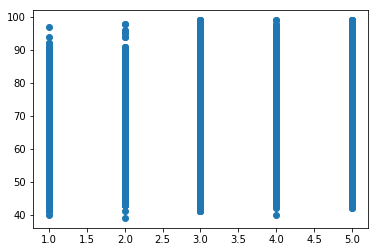

In [8]:
plt.scatter(test_data['previous_year_rating'],test_data['avg_training_score'])

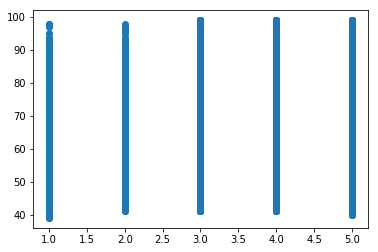

In [9]:
plt.scatter(train_data['previous_year_rating'],train_data['avg_training_score'])

In [10]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])
train_data = pd.get_dummies(train_data)

In [13]:
train_data.isnull().sum()

employee_id                        0
no_of_trainings                    0
age                                0
previous_year_rating            4124
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
is_promoted                        0
department_Analytics               0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
region_region_1                    0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
r

In [14]:
train_data['previous_year_rating'].fillna('3.34', inplace=True)

In [15]:
test_data = pd.get_dummies(test_data)

In [16]:
test_data.isnull().sum()

employee_id                        0
no_of_trainings                    0
age                                0
previous_year_rating            1812
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
department_Analytics               0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
region_region_1                    0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
region_region_18                   0
r

In [17]:
test_data['previous_year_rating'].fillna(3.34, inplace=True)

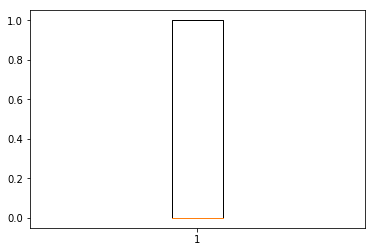

In [18]:
plt.boxplot(train_data['KPIs_met >80%'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1789bb8ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x1789bb944e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1789bb8aa20>],
 'medians': [<matplotlib.lines.Line2D at 0x1789bb94b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1789bb94eb8>],
 'means': []}

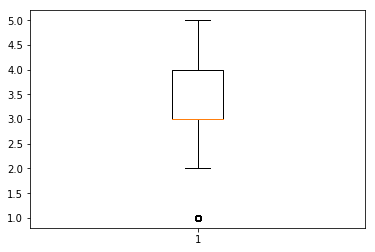

In [19]:
plt.boxplot(test_data['previous_year_rating'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1789bbf2518>,
 'caps': [<matplotlib.lines.Line2D at 0x1789bbf2ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1789bbf2128>],
 'medians': [<matplotlib.lines.Line2D at 0x1789bbf2fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1789bbfc5c0>],
 'means': []}

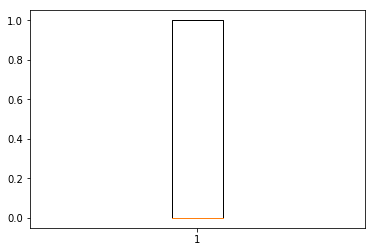

In [20]:
plt.boxplot(test_data['KPIs_met >80%'])

In [21]:
train_data.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

In [22]:
from sklearn.model_selection import train_test_split
x=train_data[['employee_id','no_of_trainings','age','previous_year_rating','length_of_service']]
y=train_data['KPIs_met >80%']

In [23]:
x=pd.get_dummies(x)

In [24]:
x

,employee_id,no_of_trainings,age,length_of_service,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.34
0,65438,1,35,8,0,0,0,0,1,0
1,65141,1,30,4,0,0,0,0,1,0
2,7513,1,34,7,0,0,1,0,0,0
3,2542,2,39,10,1,0,0,0,0,0
4,48945,1,45,2,0,0,1,0,0,0
5,58896,2,31,7,0,0,1,0,0,0
6,20379,1,31,5,0,0,1,0,0,0
7,16290,1,33,6,0,0,1,0,0,0
8,73202,1,28,5,0,0,0,1,0,0
9,28911,1,32,5,0,0,0,0,1,0


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()

In [28]:
model.fit(x_train,y_train)

C:\Users\Shreyansh Upadhyay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
predict_train = model.predict(x_train)
print('Target on train data',predict_train) 

Target on train data [1 1 1 ... 1 0 0]


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9859929824561403


In [32]:
predict_test = model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [0 0 1 ... 0 0 0]


In [33]:
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6420789240473336


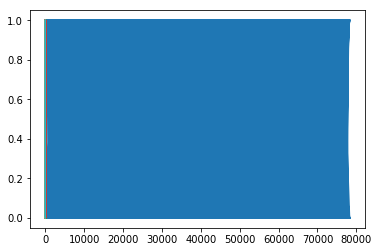

In [34]:
plt.plot(x,y)